In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("churn.csv")
data.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data = data.drop(columns=["customer_id", "country", "gender"])
data.head(5)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = data.drop(columns=['churn']) # data yg jd features
y = data['churn'] # data yg jd target buat diprediksi

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Proportion -> 60 training : 20 validation : 20 test
# Step 1 -> Split 60 (train) : 40 (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2 -> Split temp jd 20 (validation) : 20 (test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
# Buat model Single Layer Perceptron (Kasus binary classification -> jumlah neuron = 1)
# Sigmoid hasilin probability 0-1
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, activation="sigmoid", input_shape=(X_train.shape[1],))
# ])

# Model Multi Layer Perceptron (overfitting)
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dense(64, activation="relu"),
#     tf.keras.layers.Dense(32, activation="relu"),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# Model Multi Layer Perceptron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.005), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dense(1, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.l2(0.005))
])
# regularizer -> untuk handle snowball effect dari optimizer adam yang bisa update weight secara aggresive

2025-09-20 09:31:04.242152: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-20 09:31:04.243914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [7]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 128)               1152      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100


2025-09-20 09:31:04.685781: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-09-20 09:31:05.271550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - ETA: 0s - loss: 0.9322 - accuracy: 0.7852

2025-09-20 09:31:11.632814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 9s 40ms/step - loss: 0.9322 - accuracy: 0.7852 - val_loss: 0.6849 - val_accuracy: 0.8210
Epoch 2/100
188/188 [==============================] - 7s 37ms/step - loss: 0.6165 - accuracy: 0.8080 - val_loss: 0.5430 - val_accuracy: 0.8340
Epoch 3/100
188/188 [==============================] - 7s 37ms/step - loss: 0.5212 - accuracy: 0.8232 - val_loss: 0.4834 - val_accuracy: 0.8460
Epoch 4/100
188/188 [==============================] - 7s 38ms/step - loss: 0.4770 - accuracy: 0.8343 - val_loss: 0.4502 - val_accuracy: 0.8540
Epoch 5/100
188/188 [==============================] - 9s 46ms/step - loss: 0.4504 - accuracy: 0.8430 - val_loss: 0.4372 - val_accuracy: 0.8540
Epoch 6/100
188/188 [==============================] - 8s 42ms/step - loss: 0.4406 - accuracy: 0.8430 - val_loss: 0.4295 - val_accuracy: 0.8565
Epoch 7/100
188/188 [==============================] - 8s 42ms/step - loss: 0.4322 - accuracy: 0.8472 - val_loss: 0.4240 - val_accuracy: 0.8570
Epoc

In [9]:
# Prediction
predictions = model.predict(X_test[:5])
predictions_labels = [1 if p >= 0.5 else 0 for p in predictions] # list comprehension
print(f"Predictions: {predictions_labels}")

1/1 [==============================] - 1s 1s/step
Predictions: [0, 0, 0, 0, 0]


2025-09-20 09:44:20.524083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

63/63 [==============================] - 2s 27ms/step - loss: 0.4209 - accuracy: 0.8505
Loss: 0.42092666029930115
Accuracy: 0.8504999876022339


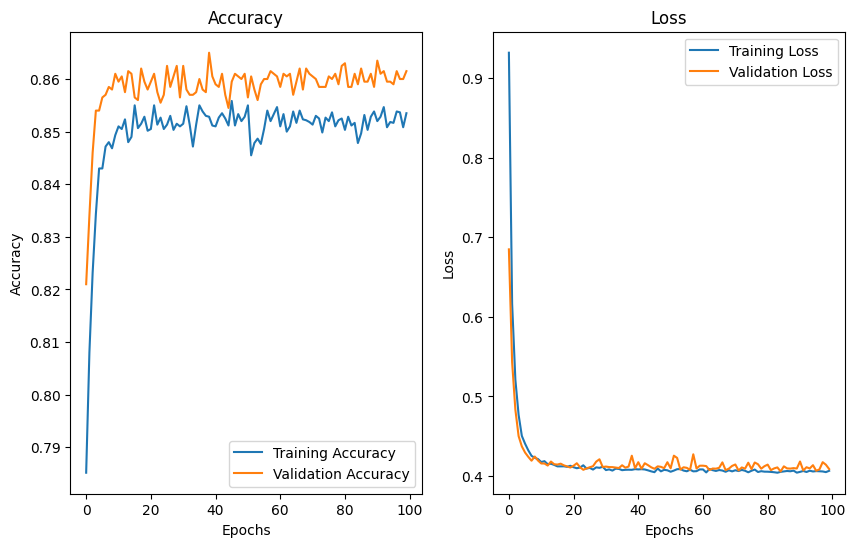

In [11]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()